In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
#from scipy.stats.mstats import winsorize
import numpy as np
#import itertools
import warnings
warnings.filterwarnings("ignore")

df = pd.read_json("scout_car.json", lines=True)

df.rename(columns=lambda x: x.replace("\n",""),inplace=True)

pd.options.display.max_columns = 600
pd.options.display.max_rows = 8
df.head(2)

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
a= list(df["first_registration"])
dfmer = pd.DataFrame(a,columns=["abdu"])
dfmer

In [10]:
col= "Type"
max_element = len(max(df.loc[df[col].apply(lambda x : isinstance(x, list))][col], key=len))


In [11]:
#df["Type"].value_counts()

In [15]:
column_names= []
for i in range(max_element):
    print(i)
    print(col + str(i+1))
    column_names.append(col + str(i+1))
print(column_names)

0
Type1
1
Type2
2
Type3
3
Type4
['Type1', 'Type2', 'Type3', 'Type4']


In [26]:
def list_to_columns(df,col): 
    dftemp = pd.DataFrame([pd.Series(x) for x in df[col]])
    column_names= []
    max_element = len(max(df.loc[df[col].apply(lambda x : isinstance(x, list))][col], key=len))
    for i in range(max_element):
        column_names.append(col + str(i+1))
    dftemp.columns = column_names
    df = df.drop(col,axis=1)
    if max_element == 1:
        dftemp.rename(columns={col+'1': col},inplace = True)
    df_added = pd.concat([df, dftemp], axis=1, sort=False)
    return df_added

In [27]:
df = list_to_columns(df,"Type")

In [30]:
df

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15918,https://www.autoscout24.com//offers/renault-es...,Renault Espace,INITIALE PARIS TCe 225 EDC GPF NAVI SHZ AUX,Van,40999,VAT deductible,- km,01/2019,1 previous owner,NaN,165 kW,"[, Demonstration, , Super 95]",\n1\n,NaN,"[\nYes\n, \n153 g CO2/km (comb)\n]",NaN,NaN,NaN,[],\nRenault\n,"[\n, Espace, \n]",[\nRe_30000008029\n],"[\n, 2019, \n]","[\n, Grey, \n]",[\nMetallic\n],[\nTitanium-Grau Metallic\n],"[\nFull leather, Brown\n]","[\n, Van, \n]",[\n5\n],[\n5\n],[\n3333/BHJ\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,685 kg\n]",[\n4WD\n],"[\n, Super 95, \n]","[[6.8 l/100 km (comb)], [8.7 l/100 km (city)],...",[\n153 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...",[USB],"[Alloy wheels, Touch screen]","[ABS, Blind spot monitor, Daytime running ligh...","[\n, Sicherheit Airbags:, , Seitenairbag, , ...",[\n4 (Green)\n],NaN,[\nGermany\n],NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
def list_to_feat_cols(df,col_list):
    dftemp = pd.DataFrame()
    for col in col_list:
        a = df[col].explode().unique()
        max_list = sorted([i for i in a if not pd.isnull(list(a)[list(a).index(i)])])
        for i in range(len(max_list)):
            dftemp[f"{col} {str(i+1)} {max_list[i]}"] = df[col].apply(lambda x : 1 if (type(x) == list and max_list[i] in x) \
               else (0 if (type(x) == list and max_list[i] not in x) else x ))
        df = df.drop(col,axis=1)
    df_added = pd.concat([df, dftemp], axis=1, sort=False)
    return df_added

In [38]:
col = "Extras"
a = df[col].explode().unique()

In [66]:
list_to_feat_cols(df,["Extras"])

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Safety & Security,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from,Extras 1 Alloy wheels,Extras 2 Cab or rented Car,Extras 3 Catalytic Converter,Extras 4 Handicapped enabled,Extras 5 Right hand drive,Extras 6 Roof rack,Extras 7 Shift paddles,Extras 8 Ski bag,Extras 9 Sliding door,Extras 10 Sport package,Extras 11 Sport seats,Extras 12 Sport suspension,Extras 13 Touch screen,Extras 14 Trailer hitch,Extras 15 Tuned car,Extras 16 Voice Control,Extras 17 Winter tyres
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 

In [37]:
list(df[col].explode().unique())

['Alloy wheels',
 'Catalytic Converter',
 'Voice Control',
 'Sport seats',
 'Sport suspension',
 'Sport package',
 nan,
 'Shift paddles',
 'Winter tyres',
 'Touch screen',
 'Handicapped enabled',
 'Trailer hitch',
 'Cab or rented Car',
 'Roof rack',
 'Tuned car',
 'Ski bag',
 'Sliding door',
 'Right hand drive']

In [39]:
max_list = sorted([i for i in a if not pd.isnull(list(a)[list(a).index(i)])])
max_list

['Alloy wheels',
 'Cab or rented Car',
 'Catalytic Converter',
 'Handicapped enabled',
 'Right hand drive',
 'Roof rack',
 'Shift paddles',
 'Ski bag',
 'Sliding door',
 'Sport package',
 'Sport seats',
 'Sport suspension',
 'Touch screen',
 'Trailer hitch',
 'Tuned car',
 'Voice Control',
 'Winter tyres']

In [40]:
list(a).index(i)

ValueError: 3 is not in list

In [ ]:
True if (type(x) == list and max_list[i] in x) \
               else (False if (type(x) == list and max_list[i] not in x) else x ))

In [43]:
"alloy" in ["aaa","alloy"]

True

0        False
         ...  
15918    False
Name: make_model, Length: 15919, dtype: bool

In [63]:
a = df["make_model"].apply(lambda x : "Meercedes" if "Audi" \
                           in x else  ("Merve" if "Ren" in x else ("Ferrari" if "Opel" in x else "deli")))

In [64]:
a.value_counts()

Ferrari      7343
Meercedes    5712
Merve        2864
Name: make_model, dtype: int64

In [53]:
df.make_model.value_counts()

Audi A3    3097
           ... 
Audi A2       1
Name: make_model, Length: 9, dtype: int64

In [46]:
semih = "kral"

In [ ]:
if "kr" in semih:
    print("True")
else:
    

In [67]:
def check_is_list(df):
    list_of_columns = []
    non_list_of_columns = []
    for i in df.columns:
        counter_list=0
        counter_non_list=0
        for j in df[i].values:
            if isinstance(j, list):
                counter_list+=1
            else:
                counter_non_list+=1
        if counter_list > 0:
            list_of_columns.append(i)
        else :
            non_list_of_columns.append(i)
    return list_of_columns,non_list_of_columns

In [69]:
a, b =check_is_list(df)

In [71]:
b

['url',
 'make_model',
 'short_description',
 'body_type',
 'price',
 'vat',
 'km',
 'registration',
 'prev_owner',
 'kW',
 'hp',
 'Make',
 'Availability',
 'Available from']

In [73]:
def get_all_df(df):
    for i in df.columns:
        print(df[i].value_counts(dropna = False).rename_axis(i +' unique_values').reset_index(name=i +' counts'))


In [74]:
get_all_df(df)

                                       url unique_values  url counts
0      https://www.autoscout24.com//offers/opel-corsa...           1
1      https://www.autoscout24.com//offers/opel-corsa...           1
2      https://www.autoscout24.com//offers/opel-corsa...           1
3      https://www.autoscout24.com//offers/opel-astra...           1
...                                                  ...         ...
15915  https://www.autoscout24.com//offers/renault-cl...           1
15916  https://www.autoscout24.com//offers/audi-a3-sp...           1
15917  https://www.autoscout24.com//offers/renault-cl...           1
15918  https://www.autoscout24.com//offers/opel-astra...           1

[15919 rows x 2 columns]
   make_model unique_values  make_model counts
0                   Audi A3               3097
1                   Audi A1               2614
2             Opel Insignia               2598
3                Opel Astra               2526
..                      ...                ...
5 

      Offer Number unique_values  Offer Number counts
0                            NaN                 3175
1                  [\nXJ38068\n]                   27
2                  [\nHM53619\n]                   27
3                  [\nLT67679\n]                   27
...                          ...                  ...
11437                  [\n101\n]                    1
11438               [\n418394\n]                    1
11439             [\nrv290009\n]                    1
11440               [\nG02394\n]                    1

[11441 rows x 2 columns]
  First Registration unique_values  First Registration counts
0                   [\n, 2018, \n]                       4522
1                   [\n, 2016, \n]                       3674
2                   [\n, 2017, \n]                       3273
3                   [\n, 2019, \n]                       2853
4                              NaN                       1597
   Body Color unique_values  Body Color counts
0           [\n

                        Safety & Security unique_values  \
0                                                   NaN   
1     [ABS, Central door lock, Daytime running light...   
2     [ABS, Central door lock, Daytime running light...   
3     [ABS, Central door lock, Daytime running light...   
...                                                 ...   
4440  [ABS, Adaptive headlights, Central door lock, ...   
4441  [ABS, Alarm system, Central door lock, Driver ...   
4442  [ABS, Central door lock, Central door lock wit...   
4443  [ABS, Central door lock with remote control, D...   

      Safety & Security counts  
0                          982  
1                          538  
2                          480  
3                          275  
...                        ...  
4440                         1  
4441                         1  
4442                         1  
4443                         1  

[4444 rows x 2 columns]
                               description unique_valu

In [75]:
def get_col_details(df,col):
    print("VALUE COUNTS")
    print(df[col].value_counts(dropna=False))
    print("-----------------------\n","UNIQUE VALUES")
    print(df[col].unique())
    print("-----------------------\n","NULL SUM")
    print(df[col].isnull().sum())
    print("-----------------------\n","NULL Percentage")
    print(df[col].isnull().sum()*100 /df[col].index.stop )
    print("-----------------------\n","COLUMN with NONE-NULL-NAN")
    print(df.query(f'{col} != {col}')[col])

In [77]:
get_col_details(df,"make_model")

VALUE COUNTS
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
                  ... 
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, Length: 9, dtype: int64
-----------------------
 UNIQUE VALUES
['Audi A1' 'Audi A2' 'Audi A3' 'Opel Astra' 'Opel Corsa' 'Opel Insignia'
 'Renault Clio' 'Renault Duster' 'Renault Espace']
-----------------------
 NULL SUM
0
-----------------------
 NULL Percentage
0.0
-----------------------
 COLUMN with NONE-NULL-NAN
Series([], Name: make_model, dtype: object)


In [78]:
def Nan_to_list(df,col):
    Nan_rows = df[col].isnull()
    df.loc[Nan_rows,col] = df.loc[Nan_rows,col].apply(lambda x : [])

In [93]:
col = "vat"
a = df[col].isnull()
df.loc[a,col] = df.loc[a,col].apply(lambda x : "okokok")

In [94]:
df.vat

0          VAT deductible
1        Price negotiable
2          VAT deductible
3                  okokok
               ...       
15915      VAT deductible
15916      VAT deductible
15917      VAT deductible
15918      VAT deductible
Name: vat, Length: 15919, dtype: object

<AxesSubplot:>

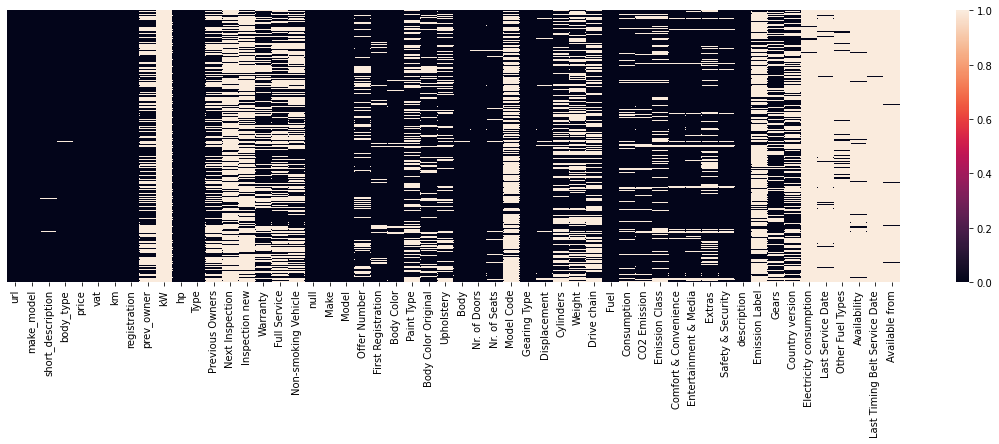

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,5))
sns.heatmap(df.isnull(),yticklabels=False )

In [98]:
tips = sns.load_dataset('tips')

In [99]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [101]:
a = plt.style.available

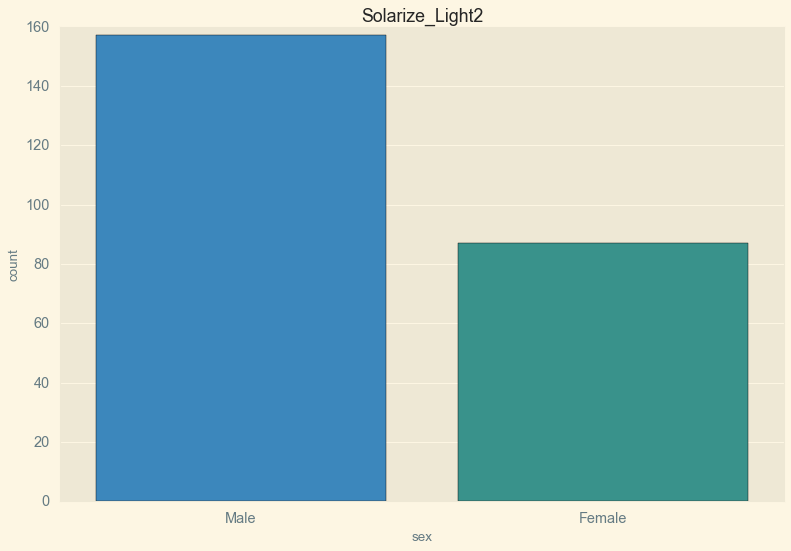

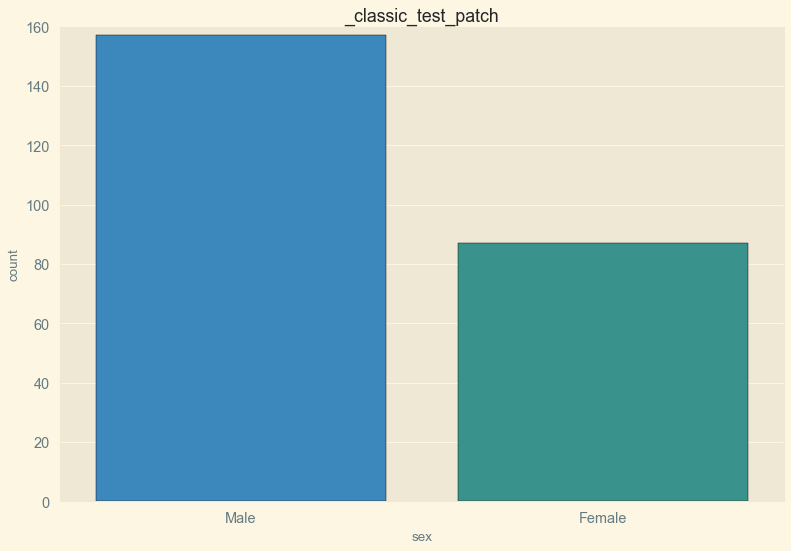

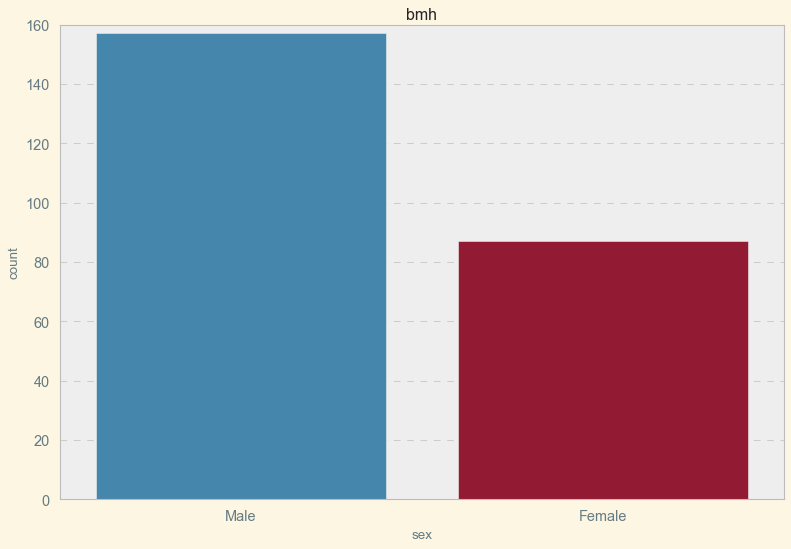

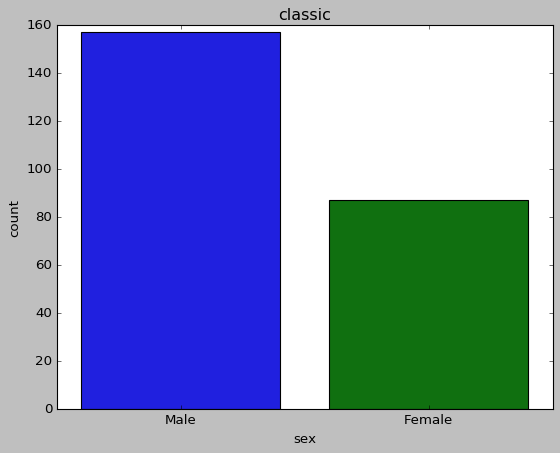

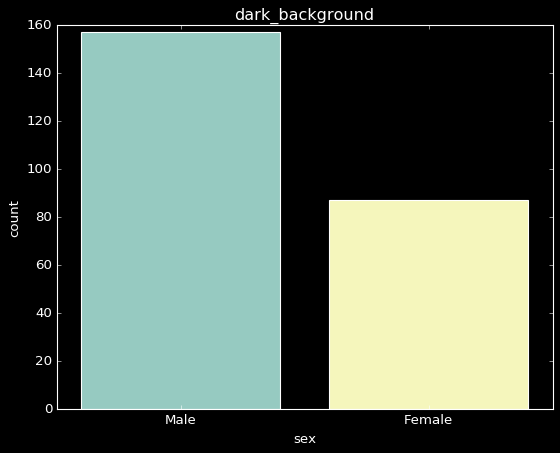

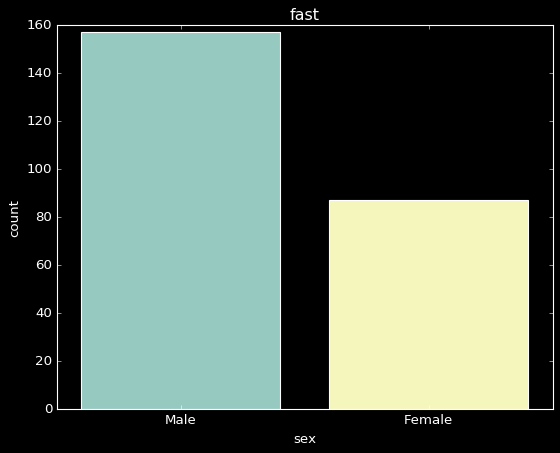

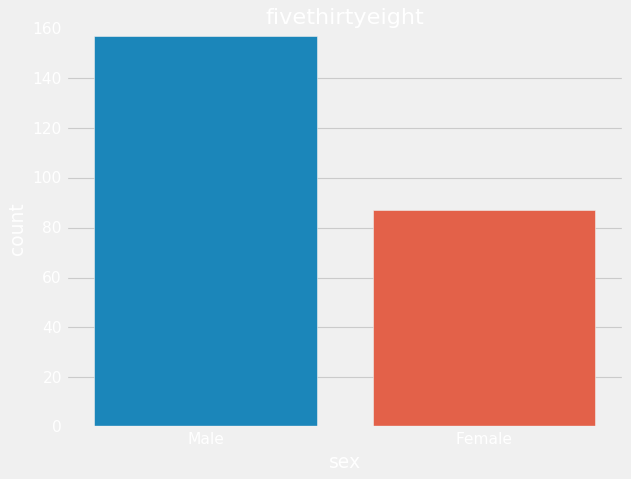

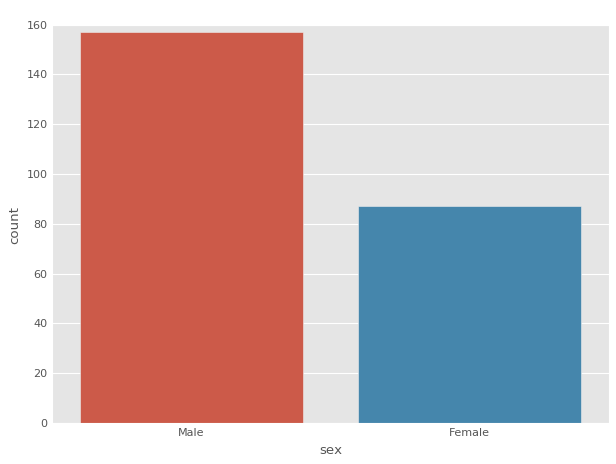

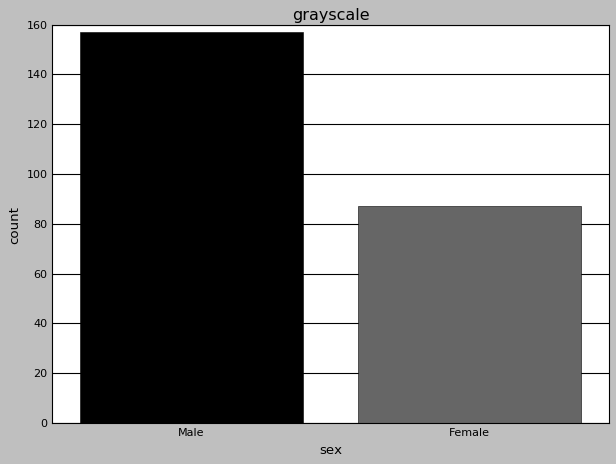

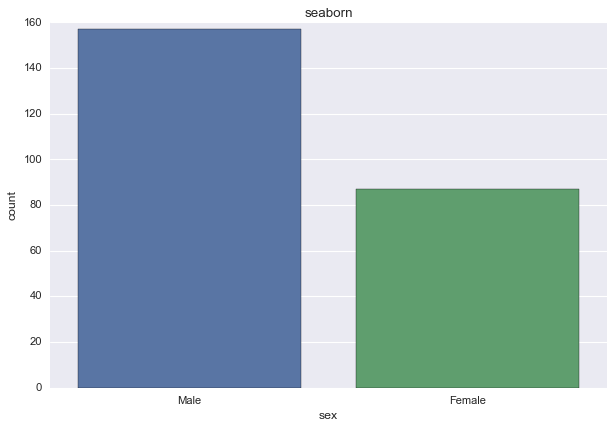

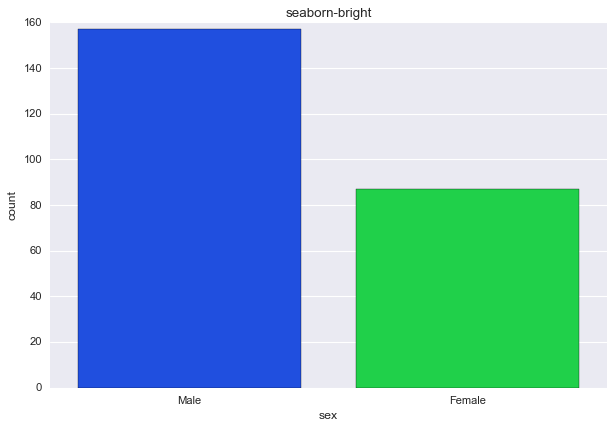

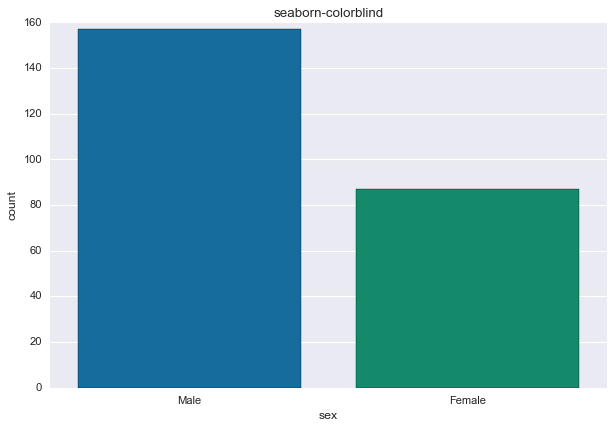

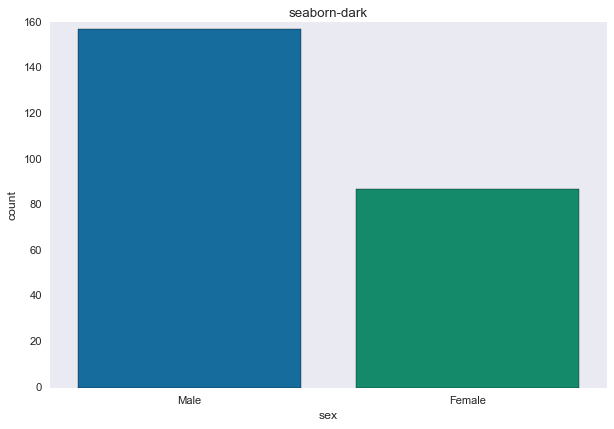

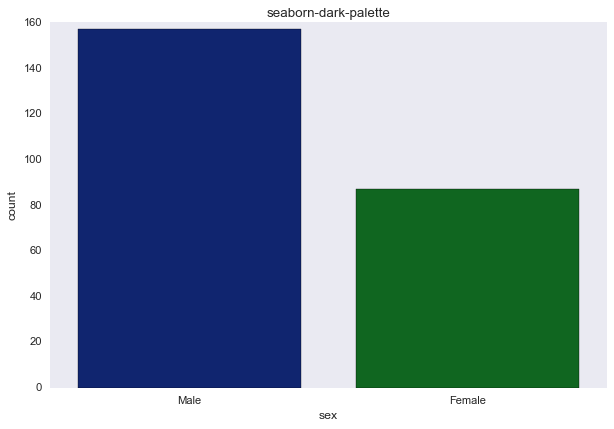

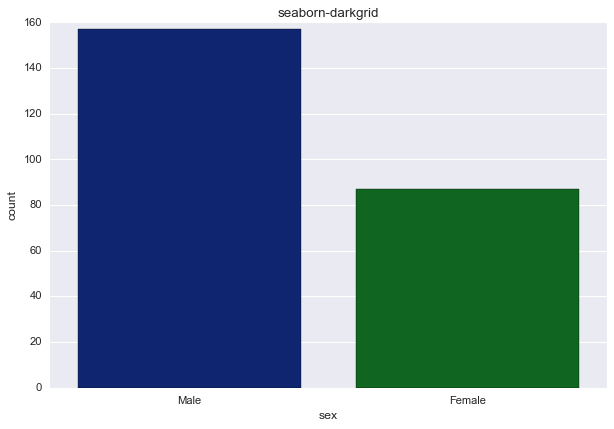

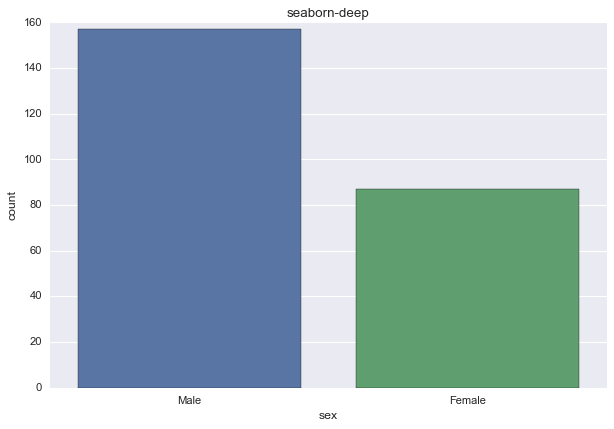

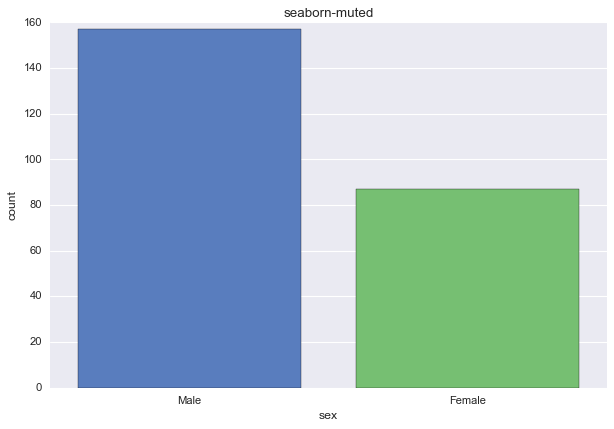

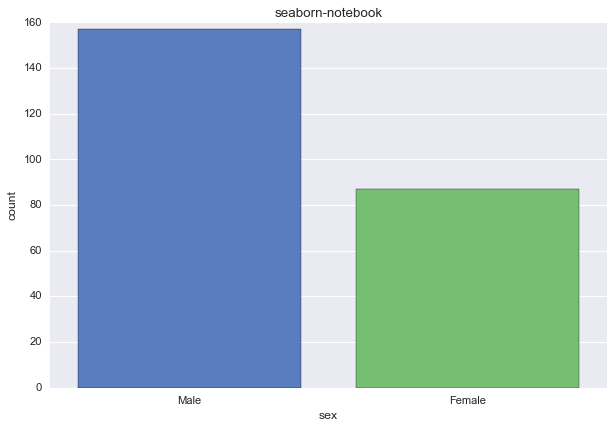

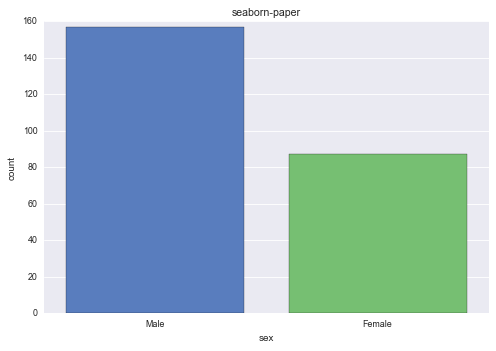

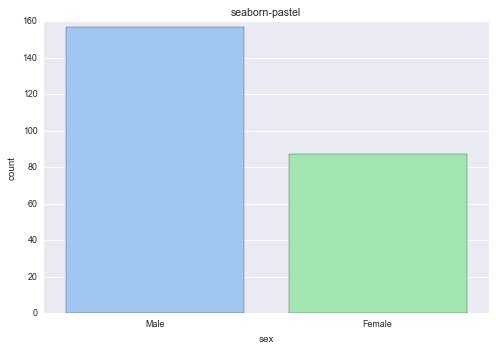

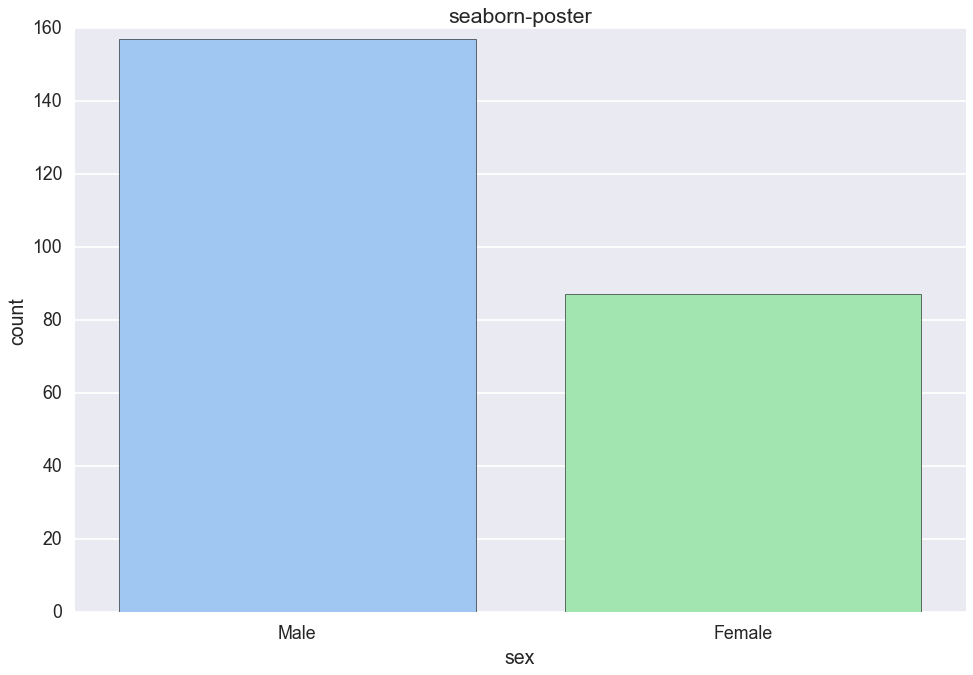

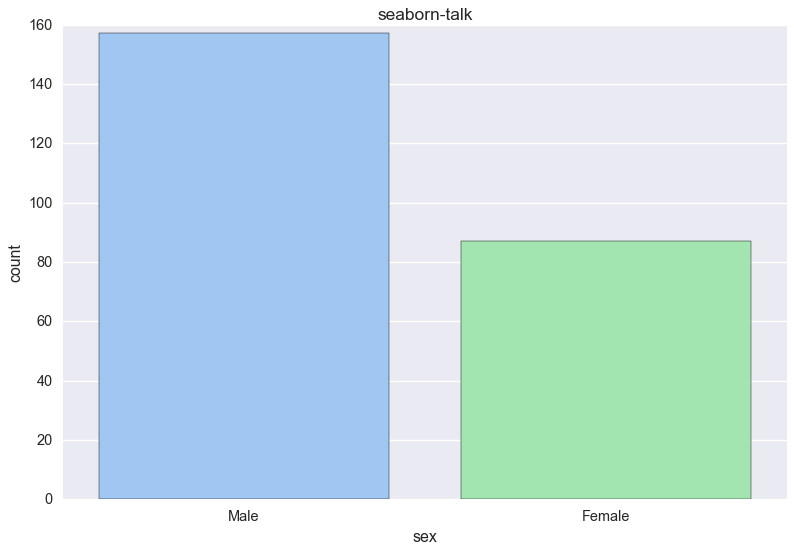

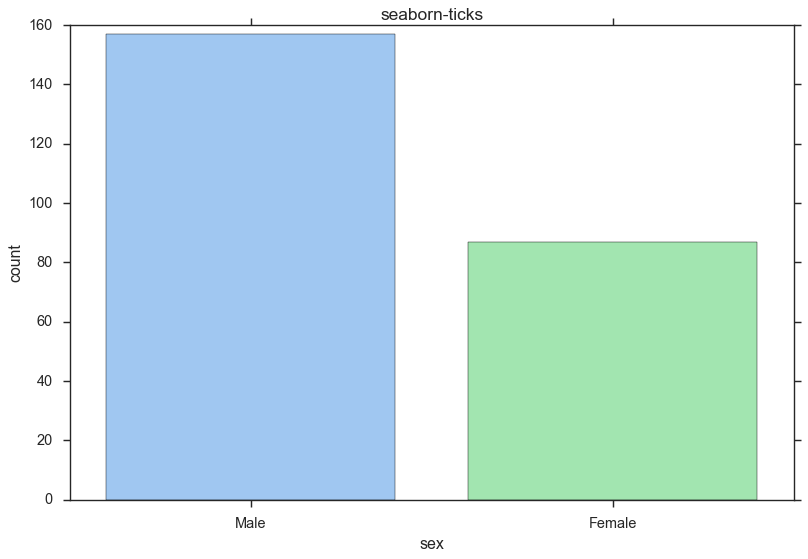

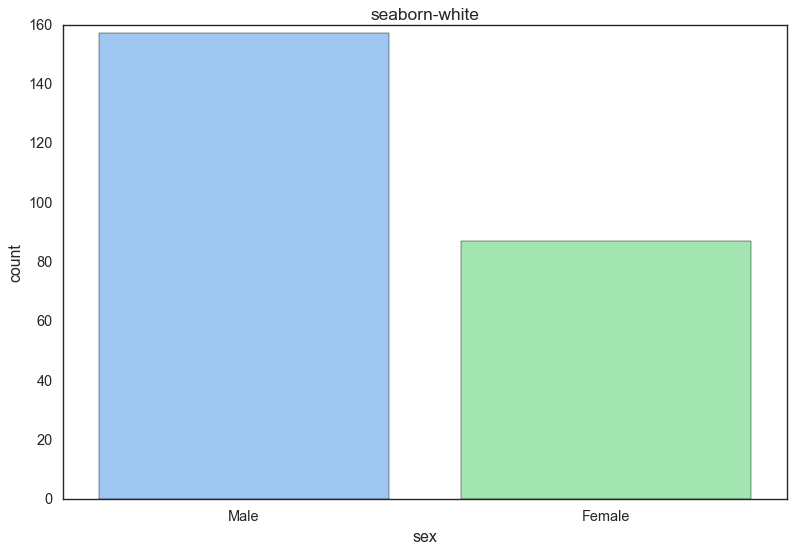

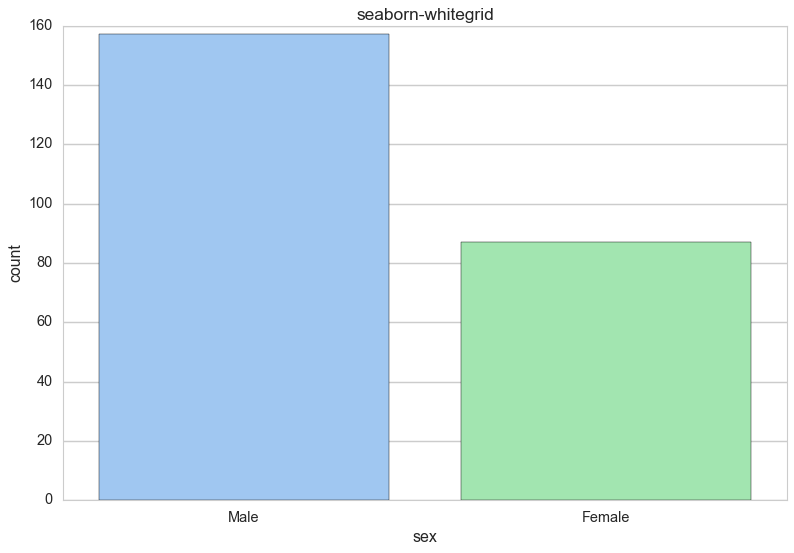

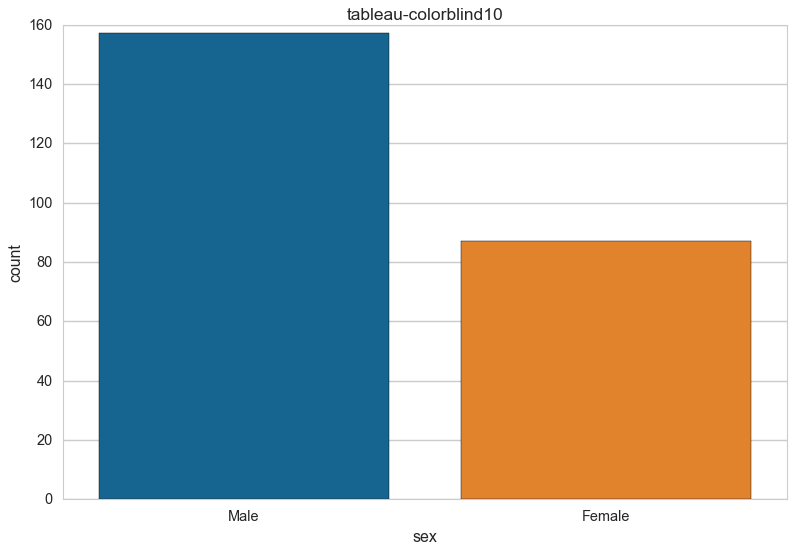

In [106]:
for i in plt.style.available:
    plt.style.use(i)
    sns.countplot(x="sex",data=tips)
    plt.title(i)
    plt.show()

In [121]:
#df.loc[df[df["price"]<500].index,"price"] = 
df.loc[df[df["price"]<500].index,"price"].apply(lambda x : 5*x)

6066    1275
8594      65
8828     600
8829    1655
Name: price, dtype: int64

In [122]:
df.loc[df[df["price"]<500].index,["price","prev_owner"]]

,price,prev_owner
6066,255,None
8594,13,None
8828,120,None
8829,331,None


In [113]:
df[df["price"]<500].index

Int64Index([6066, 8594, 8828, 8829], dtype='int64')

In [118]:
col = "prev_owner"
a = df[col].isnull()
df.loc[df[col].isnull(),col]

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,SPORTBACK TFSI ULTRA 95 S-TRONIC AMB.,Sedans,17990,okokok,"16,103 km",06/2017,None,NaN,70 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,\n3 months\n,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, White, \n]",NaN,[\nBlanc\n],NaN,"[\n, Sedans, \n]",[\n5\n],[\n4\n],NaN,"[\n, Automatic, \n]",[\n999 cc\n],NaN,NaN,NaN,"[\n, Gasoline, \n]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[\nClim automatique,Ecran multifonction couleu...",NaN,[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,SPORTBACK1.6 TDI 116 CV S tronic Metal plus,Sedans,18500,VAT deductible,"11,300 km",05/2018,None,NaN,85 kW,"[, Used, , Diesel (Particulate Filter)]",NaN,NaN,NaN,NaN,\n,NaN,[],\nAudi\n,"[\n, A1, \n]",[\n11159281\n],"[\n, 2018, \n]","[\n, Black, \n]",[\nMetallic\n],[\nNero\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",[\n4\n],"[\n1,250 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[4 l/100 km (comb)], [4.6 l/100 km (city)], [...",[\n105 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Multi-function steering whe...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Shift paddles]","[ABS, Central door lock, Daytime running light...","[\nautovettura ufficiale unico proprietario , ...",NaN,[\n7\n],[\nItaly\n],NaN,NaN,NaN,NaN,NaN,NaN
13,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TFSI 150ch COD Ambition Luxe S tronic 7,Sedans,18399,okokok,"45,764 km",06/2016,None,NaN,112 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,\n12 months\n,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",[\nscap-ED-642-CV\n],"[\n, 2016, \n]","[\n, Grey, \n]",NaN,[\nGris Clair\n],NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,395 cc\n]",NaN,NaN,NaN,"[\n, Gasoline, \n]",NaN,NaN,NaN,"[Air conditioning, Automatic climate control, ...","[Bluetooth, On-board computer, Radio]","[Alloy wheels, Sport seats, Sport suspension]","[ABS, Adaptive headlights, Central door lock, ...",[\nMarque: AUDIModèle: A1Version: 1.4 TFSI 150...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15912,https://www.autoscout24.com//offers/renault-es...,Renault Espace,Blue dCi 200CV EDC Executive 4Control,Van,39950,VAT deductible,- km,-/-,None,NaN,14